## 1 Generate training data.

In [15]:
import numpy as np

# 產生假訓練資料
# y = 3 * x + 8 (模型結果函式)
# y = weight * x + biases
x_datas = np.random.rand(100).astype(np.float32)
random = np.random.normal(0, 0.3, x_datas.shape) # 常態分佈產生亂數, shape跟x_datas一樣
y_datas = 3 * x_datas + 8 + random

# print('x_datas: ', x_datas, x_datas.shape)
# print('y_datas: ', y_datas, y_datas.shape)

## 2 Create computal gragh.

In [16]:
import tensorflow as tf

tf.reset_default_graph()

weights = tf.Variable(tf.ones([1]), dtype=tf.float32, name='weights')
biases = tf.Variable(tf.zeros([1]), dtype=tf.float32, name='biases')
y = weights * x_datas + biases

## 3 Prepare loss function and optimizer.

In [17]:
# reduce --> 降階 => 0-D
loss = tf.reduce_mean(tf.square(y - y_datas))
# GradientDescent 梯度下降法
# optimizer 優化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5) # 0.0~1.0
train = optimizer.minimize(loss=loss)

## 4 Run the session

In [18]:
results = []

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step in range(1000):
        session.run(train)
        results.append({
            'loss': session.run(loss),
            'weights': session.run(weights),
            'biases': session.run(biases)
        })

In [19]:
! pip install pandas
! pip install matplotlib

In [20]:
import pandas
import matplotlib.pyplot as plt

pd = pandas.DataFrame(results)
# pd

In [21]:
pd['weights'] = pd['weights'].map(lambda x: x[0])
pd['biases'] = pd['biases'].map(lambda x: x[0])

In [22]:
%matplotlib inline

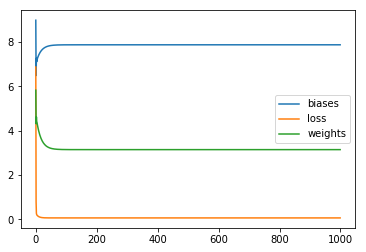

In [23]:
pd.plot()

-------------------------------------

In [24]:
import tensorflow as tf

tf.reset_default_graph()
random_weights = tf.random_uniform([1], -1.0, 1.0)

# weights = tf.Variable(tf.ones([1]), dtype=tf.float32, name='weights')
weights = tf.Variable(random_weights, dtype=tf.float32, name='weights')
biases = tf.Variable(tf.zeros([1]), dtype=tf.float32, name='biases')
y = weights * x_datas + biases

In [25]:
# reduce --> 降階 => 0-D
loss = tf.reduce_mean(tf.square(y - y_datas))
# GradientDescent 梯度下降法
# optimizer 優化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 0.0~1.0
train = optimizer.minimize(loss=loss)

In [26]:
results = []

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step in range(1000):
        session.run(train)
        results.append({
            'loss': session.run(loss),
            'weights': session.run(weights),
            'biases': session.run(biases)
        })

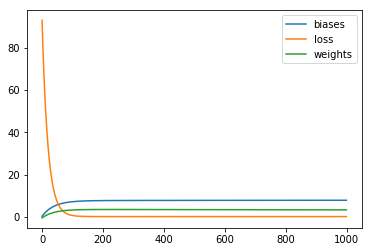

In [27]:
import pandas
import matplotlib.pyplot as plt

pd = pandas.DataFrame(results)

pd['weights'] = pd['weights'].map(lambda x: x[0])
pd['biases'] = pd['biases'].map(lambda x: x[0])

pd.plot()

## matplotlib draw (x, y)

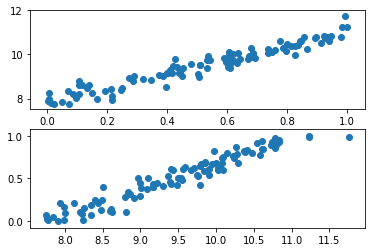

In [28]:
import matplotlib.pyplot as plot


figure = plot.figure()
# 2 x 1 第1子圖
subplot1 = figure.add_subplot(2, 1, 1)
subplot1.scatter(x_datas, y_datas)
# 2 x 1 第2子圖
subplot2 = figure.add_subplot(2, 1, 2)
subplot2.scatter(y_datas, x_datas)
plot.show()

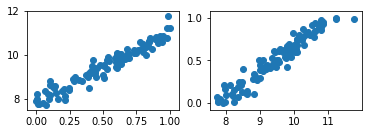

In [33]:
figure = plot.figure()
subplot1 = figure.add_subplot(221)
subplot1.scatter(x_datas, y_datas)
subplot2 = figure.add_subplot(222)
subplot2.scatter(y_datas, x_datas)
plot.show()